In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers_table_raw = pd.read_csv('data/dataset.csv')
customers_table_raw

,years-customer-register,avg-clicks-per-session,time-spent-on-app,time-spent-on-website,total-amount-spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075
...,...,...,...,...,...
495,1.820811,34.606242,11.761884,38.126520,402.167122
496,4.183144,34.238242,11.550300,35.769330,551.023002
497,3.393903,32.047815,12.482670,35.536025,497.389558
498,4.426364,30.971676,11.731364,36.074551,494.638610


For the sake of clarity, I'll adjust the time columns names, so it indicates the time unit.

In [3]:
customers_table = customers_table_raw.copy()
customers_table.columns = ['years-customer-register', 'avg-clicks-per-session', 'minutes-spent-on-app', 'minutes-spent-on-website', 'total-amount-spent']

In [4]:
customers_table

,years-customer-register,avg-clicks-per-session,minutes-spent-on-app,minutes-spent-on-website,total-amount-spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075
...,...,...,...,...,...
495,1.820811,34.606242,11.761884,38.126520,402.167122
496,4.183144,34.238242,11.550300,35.769330,551.023002
497,3.393903,32.047815,12.482670,35.536025,497.389558
498,4.426364,30.971676,11.731364,36.074551,494.638610


In [5]:
customers_table.describe()

,years-customer-register,avg-clicks-per-session,minutes-spent-on-app,minutes-spent-on-website,total-amount-spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.533462,33.053194,12.052488,37.060445,499.314038
std,0.999278,0.992563,0.994216,1.010489,79.314782
min,0.269901,29.532429,8.508152,33.913847,256.670582
25%,2.930450,32.341822,11.388153,36.349257,445.038277
50%,3.533975,33.082008,11.983231,37.069367,498.887875
75%,4.126502,33.711985,12.753850,37.716432,549.313828
max,6.922689,36.139662,15.126994,40.005182,765.518462


In [6]:
customers_table.isnull().values.any()

False

---

### Exploratory Analysis

Here will do simple data analysis, just so we can capture some patterns within the data.

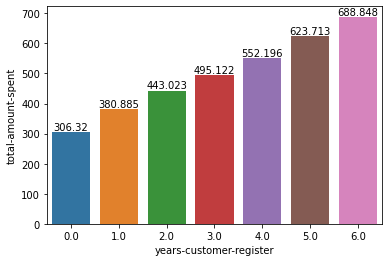

In [51]:
spending_by_years_registered = customers_table[['years-customer-register', 'total-amount-spent']].copy()
spending_by_years_registered.loc[:,'years-customer-register'] = spending_by_years_registered.loc[:,'years-customer-register'].apply(np.floor)
spending_by_years_registered = spending_by_years_registered.groupby('years-customer-register').mean().reset_index()

ax = sns.barplot(data=spending_by_years_registered, x='years-customer-register', y='total-amount-spent')
ax = ax.bar_label(ax.containers[0])

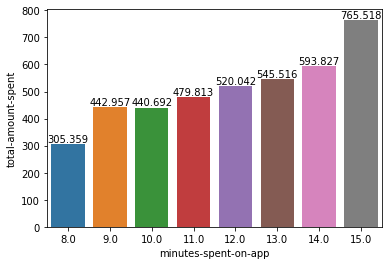

In [68]:
spending_by_minutes_on_app = customers_table[['minutes-spent-on-app', 'total-amount-spent']].copy()
spending_by_minutes_on_app['minutes-spent-on-app'] = spending_by_minutes_on_app['minutes-spent-on-app'].apply(np.floor)
spending_by_minutes_on_app = spending_by_minutes_on_app.groupby(by='minutes-spent-on-app').mean().reset_index()

_ax = sns.barplot(spending_by_minutes_on_app, x='minutes-spent-on-app', y='total-amount-spent')
_ax = _ax.bar_label(_ax.containers[0])

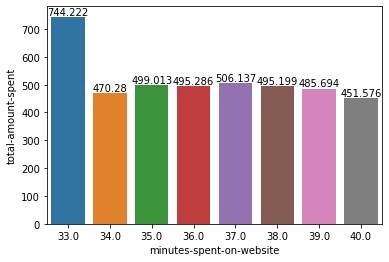

In [69]:
spending_by_minutes_on_website = customers_table[['minutes-spent-on-website', 'total-amount-spent']].copy()
spending_by_minutes_on_website['minutes-spent-on-website'] = spending_by_minutes_on_website['minutes-spent-on-website'].apply(np.floor)
spending_by_minutes_on_website = spending_by_minutes_on_website.groupby(by='minutes-spent-on-website').mean().reset_index()

_ax = sns.barplot(spending_by_minutes_on_website, x='minutes-spent-on-website', y='total-amount-spent')
_ax = _ax.bar_label(_ax.containers[0])

Now that's some intresting results! First we can see that people tend to spend way more time on the website than on the app. Second, while people who spend more time on the app usually end up spending more. On the website, we can see a most sales are made in the 33rd minute, and then the number of sales goes down to around 480 in each minute.

---

### Building models

On to what matters, let's build our first model.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [78]:
X_unsplit = customers_table.drop(columns='total-amount-spent')
y_unsplit = customers_table['total-amount-spent']
X_train, X_test, y_train, y_test = train_test_split(X_unsplit, y_unsplit, test_size=0.3)

In [84]:
first_linear_model = LinearRegression()
first_linear_model.fit(X_train, y_train)

print(first_linear_model.score(X_train, y_train))
print(first_linear_model.score(X_test, y_test))

0.9833448673759704
0.9855466996801101
